In [1]:
#!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
                      'punkt',
                      'wordnet',
                      'omw-1.4',
                      'vader_lexicon'
                      ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#!pip install imblearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [4]:
#TEXT MINING AND SENTIMENT ANALYSIS
#reading in the review data- of selected 30 hotels in Phuket Town that will be used for this analysis
frevs = pd.read_csv('ttourist_accommodation_reviews.csv')
frevs.head()

,ID,Review Date,Location,Hotel.Restaurant name,Review
0,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to..."
1,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...
2,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...
3,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...
4,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...


In [5]:
#analyzing dataset
frevs.describe()

,ID,Review Date,Location,Hotel.Restaurant name,Review
count,3059,3059,3059,3059,3059
unique,2849,1312,1,31,2849
top,rn532501000,Reviewed 2 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Fuji Restaurant is on the top floor of Central...
freq,6,43,3059,100,6


In [6]:
frevs

,ID,Review Date,Location,Hotel.Restaurant name,Review
0,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to..."
1,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...
2,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...
3,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...
4,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...
...,...,...,...,...,...
3054,rn562985064,"Reviewed February 26, 2018",Phuket Town,Pizza Hut - Jungceylon,I am obsessed with Pizza Hut so could not resi...
3055,rn558515004,"Reviewed February 4, 2018",Phuket Town,Pizza Hut - Jungceylon,I was staying at the branch in Patong Thailand...
3056,rn555370946,"Reviewed January 22, 2018",Phuket Town,Pizza Hut - Jungceylon,I went in PIzza Hut in the main commercial cen...
3057,rn554465446,"Reviewed January 17, 2018",Phuket Town,Pizza Hut - Jungceylon,It is a pizza hut and not a five star restaura...


In [7]:
#dropping the columns that were not needed
frevs.drop(columns=['ID', 'Review Date', 'Location'],inplace=True)

In [8]:
#using corpus to check stopwords from tokenized text available
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
#Creating a function to apply all of the data preprocessing steps which can then used on a corpus
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)#Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]#Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]#Stemming
  return stemmed_text

In [10]:
frevs['Hotel.Restaurant name'].value_counts()

Surf and Turf by Soul Kitchen                         100
Papaya                                                100
Tiger Inn Restaurant                                  100
Savoy Patong                                          100
Fuji Japanese Restaurant - Central Festival Phuket    100
Khaorang Breeze Restaurant                            100
MK Gold Restaurant                                    100
Salvatore's restaurant                                100
Red Onion                                             100
Natural Restaurant                                    100
Mr.Coffee                                             100
Gallery Cafe by Pinky                                 100
Crust                                                 100
Rider Cafe                                            100
La Gaetana                                            100
Eleven Two & Co.                                      100
Song Pee Nong 2                                       100
OSOT          

In [11]:
print("\n All Data Labels")
print(frevs.groupby("Hotel.Restaurant name").count())#shows class imbalance


 All Data Labels
                                                    Review
Hotel.Restaurant name                                     
Blue Elephant Phuket                                   100
China Inn Cafe                                          99
Crust                                                  100
Dibuk restaurant                                        95
Eleven Two & Co.                                       100
Fuji Japanese Restaurant - Central Festival Phuket     100
Gallery Cafe by Pinky                                  100
Honeymoon Thai Restaurant by Kenya                      94
Khaorang Breeze Restaurant                             100
Kopitiam by Wilai                                      100
La Gaetana                                             100
Le Siam                                                 95
MK Gold Restaurant                                     100
Mee Ton Poe                                             99
Mor Mu Dong                           

In [12]:
#applying preprocessing text
frevs['Review'] = frevs['Review'].apply(preprocess_text)
frevs.head()

,Hotel.Restaurant name,Review
0,Surf and Turf by Soul Kitchen,"[wow, find, true, tripadvisor, happi, chanc, d..."
1,Surf and Turf by Soul Kitchen,"[best, crossov, food, ever, fulli, satisfi, on..."
2,Surf and Turf by Soul Kitchen,"[visit, restaur, base, review, ta, order, beef..."
3,Surf and Turf by Soul Kitchen,"[husband, went, dinner, last, night, pleas, fo..."
4,Surf and Turf by Soul Kitchen,"[french, chef, realli, concern, qualiti, dish,..."


In [13]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(frevs['Review'].map(' '.join))
X = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
X.head()

,00,000,0080,0081,0082,0083,0085,0088,0089,008a,...,yummi,yummiest,yun,yung,zealand,zero,zimmerman,zimmern,zoo,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#training the dataset
from sklearn.model_selection import train_test_split
y = frevs['Hotel.Restaurant name']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,train_size=0.8,test_size=0.2,random_state=99)

<AxesSubplot:xlabel='Hotel.Restaurant name', ylabel='count'>

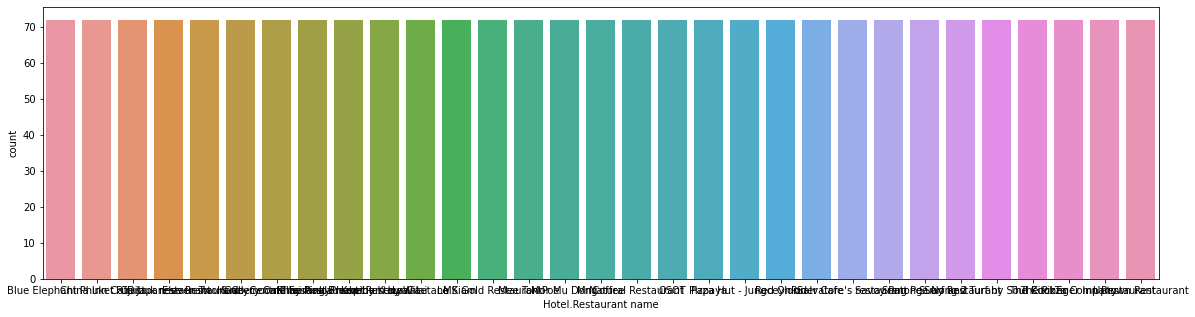

In [45]:
#sampling and visualization
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=5)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train,y_train)
plt.figure(figsize=(20,5))
sns.countplot(x=y_train_undersampled)

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_undersampled,y_train_undersampled)

MultinomialNB()

In [17]:
y_pred = model.predict(X_test)
#Computing the accuracy and making the confusion matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n' %(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('--------------------------------')
result = metrics.classification_report(y_test,y_pred)
print("Classification Report:\n",)
print(result)

accuracy:0.54


Confusion Matrix:
[[ 6  2  1  1  0  0  1  3  0  1  0  2  0  0  1  0  1  0  1  0  0  0  1  0
   0  0  0  0  0  1  0]
 [ 0 11  0  1  1  0  0  0  0  1  0  0  0  0  0  1  3  1  0  0  1  1  0  1
   0  0  0  1  0  0  0]
 [ 0  0 11  1  0  0  0  0  0  1  0  0  0  0  0  0  0  2  0  0  0  1  0  0
   0  0  0  1  2  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  1  0  0  0]
 [ 0  0  1  0 10  0  1  1  0  1  0  4  0  1  0  0  1  1  0  0  1  1  1  0
   0  1  0  2  0  0  1]
 [ 0  1  0  0  0 19  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0 13  1  1  1  0  0  0  0  0  2  0  0  1  0  0  5  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 12  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  1
   0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1
   0  1  0  0  0  0  0]
 [ 0  2  0  1  1  0  0  1  1  4  1  1  0  1  0  0  2  0  2  0  1  2  0  0
   0  4  0

In [18]:
#TEXT MINING AND SENTIMENT ANALYSIS
#reading in the review data- of selected 30 hotels in Phuket Town that will be used for this analysis
frevs1 = pd.read_csv('ttourist_accommodation_reviews.csv')
frevs1.head()

,ID,Review Date,Location,Hotel.Restaurant name,Review
0,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to..."
1,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...
2,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...
3,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...
4,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...


In [19]:
#SENTIMENTS ANALYSIS
print(preprocess_text('This is an excellent hotel with good food!'))
print(preprocess_text('This is not an excellent hotel and with bad food'))

['excel', 'hotel', 'good', 'food']
['excel', 'hotel', 'bad', 'food']


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
print(sentiment.polarity_scores('This is an excellent hotel with good food!'))
print(sentiment.polarity_scores('This is not an excellent hotel and with bad food'))

{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.784}
{'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.7578}


In [21]:
#we can extract the values from the dictionary and create new columns within our dataframe
frevs1['compound']=[sentiment.polarity_scores(review)['compound'] for review in frevs1['Review']]
frevs1['neg']=[sentiment.polarity_scores(review)['neg'] for review in frevs1['Review']]
frevs1['neu']=[sentiment.polarity_scores(review)['neg'] for review in frevs1['Review']]
frevs1['pos']=[sentiment.polarity_scores(review)['pos'] for review in frevs1['Review']]

In [22]:
frevs1.head()

,ID,Review Date,Location,Hotel.Restaurant name,Review,compound,neg,neu,pos
0,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.9765,0.0,0.0,0.405
1,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.8908,0.0,0.0,0.453
2,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.8720,0.0,0.0,0.191
3,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.9035,0.0,0.0,0.238
4,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.5067,0.1,0.1,0.194


In [23]:
frevs1[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3059.000000,3059.000000,3059.000000,3059.000000
mean,0.627696,0.027749,0.027749,0.217069
std,0.436576,0.050525,0.050525,0.131219
min,-0.951000,0.000000,0.000000,0.000000
25%,0.541200,0.000000,0.000000,0.123000
50%,0.812600,0.000000,0.000000,0.208000
75%,0.913800,0.044000,0.044000,0.302000
max,0.990400,0.380000,0.380000,0.713000


<AxesSubplot:xlabel='compound', ylabel='Count'>

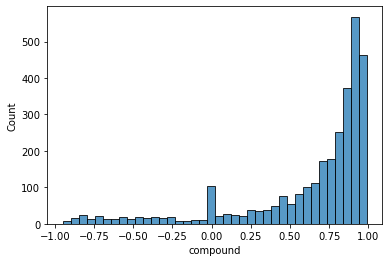

In [24]:
sns.histplot(frevs1['compound'])#PLOT FOR COMPOUND TOKENS

<AxesSubplot:xlabel='pos', ylabel='Count'>

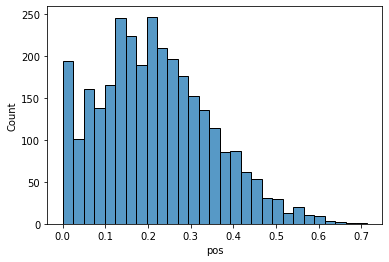

In [25]:
sns.histplot(frevs1['pos'])#PLOT FOR POSITIVE TOKENS

<AxesSubplot:xlabel='neg', ylabel='Count'>

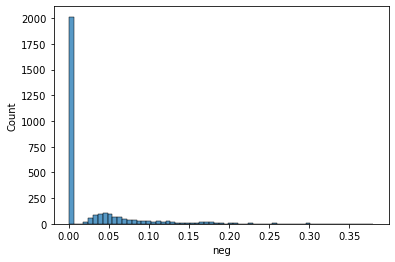

In [26]:
sns.histplot(frevs1['neg'])#PLOT FOR NEGATIVE TOKENS

In [27]:
#exploring negative reviews per hotel in the dataset 
(frevs1['compound']<=0).groupby(frevs1['Hotel.Restaurant name']).sum()

Hotel.Restaurant name
Blue Elephant Phuket                                   4
China Inn Cafe                                         6
Crust                                                  6
Dibuk restaurant                                      13
Eleven Two & Co.                                       9
Fuji Japanese Restaurant - Central Festival Phuket     5
Gallery Cafe by Pinky                                  6
Honeymoon Thai Restaurant by Kenya                    10
Khaorang Breeze Restaurant                            10
Kopitiam by Wilai                                     10
La Gaetana                                             7
Le Siam                                               28
MK Gold Restaurant                                    21
Mee Ton Poe                                           10
Mor Mu Dong                                           10
Mr.Coffee                                              7
Natural Restaurant                                    20
OSOT     

In [28]:
#calculate as percentage output of total negative reviews
percent_negative = pd.DataFrame((frevs1['compound']<=0).groupby(frevs1['Hotel.Restaurant name']).sum()
                            /frevs1['Hotel.Restaurant name'].groupby(frevs1['Hotel.Restaurant name']).count()*100,
                  columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel.Restaurant name,
OSOT,3.000000
Blue Elephant Phuket,4.000000
Surf and Turf by Soul Kitchen,5.000000
Fuji Japanese Restaurant - Central Festival Phuket,5.000000
Papaya,5.000000
Crust,6.000000
Gallery Cafe by Pinky,6.000000
China Inn Cafe,6.060606
Suay Restaurant,7.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel.Restaurant name'>

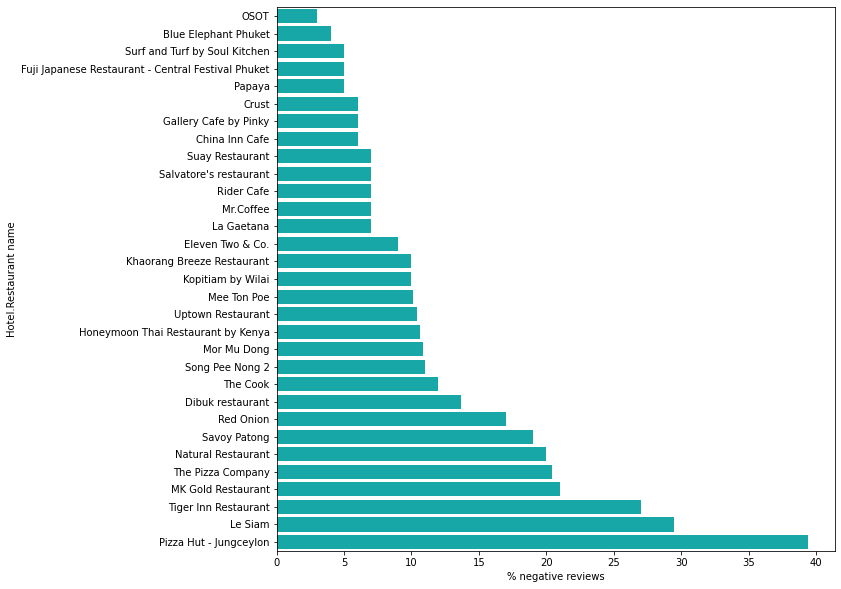

In [29]:
#visualizing the negative reviews using barplot 
plt.figure(figsize=(10,10))
sns.barplot(data=percent_negative, x = '% negative reviews',y=percent_negative.index,color='c')

In [30]:
#using corpus to check stopwords from tokenized text available
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
#Creating a function to apply all of the data preprocessing steps which can then used on a corpus
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)#Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]#Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]#Stemming
  return stemmed_text

In [32]:
#process the text data ready for wordcloud visualization, using the function we defined earlier
#for this part of the exercise we will focus specifically on OSOT Hotel, as it has lowest value of negative review

frevs1['processed_review'] = frevs1['Review'].apply(preprocess_text)

reviews_positive_subset = frevs1.loc[(frevs1['Hotel.Restaurant name']=='OSOT') 
                                       & (frevs1['compound']>0),:]

reviews_negative_subset = frevs1.loc[(frevs1['Hotel.Restaurant name']=='OSOT')
                                      & (frevs1['compound']<=0),:]
reviews_positive_subset.head() 

,ID,Review Date,Location,Hotel.Restaurant name,Review,compound,neg,neu,pos,processed_review
294,rn580759667,Reviewed 4 days ago,Phuket Town,OSOT,Really good pizza margarita & pasta's. The dou...,0.6710,0.049,0.049,0.184,"[realli, good, pizza, margarita, pasta', dough..."
295,rn578537420,Reviewed 1 week ago,Phuket Town,OSOT,The pizzas we ordered came quickly and were re...,0.7501,0.000,0.000,0.252,"[pizza, order, came, quickli, realli, tasti, s..."
296,rn577610325,Reviewed 2 weeks ago,Phuket Town,OSOT,We really enjoyed our meal at OSOT. The staff ...,0.9637,0.000,0.000,0.454,"[realli, enjoy, meal, osot, staff, friendli, r..."
297,rn576028140,Reviewed 3 weeks ago,Phuket Town,OSOT,First time visiting Phuket town... After 2 wee...,0.8748,0.000,0.000,0.200,"[first, time, visit, phuket, town, 2, week, th..."
298,rn573411424,Reviewed 5 weeks ago,Phuket Town,OSOT,Saw this place many times but never had a chan...,0.9571,0.036,0.036,0.291,"[saw, place, mani, time, never, chanc, visit, ..."


In [33]:
reviews_negative_subset['processed_review']

300    [visit, monkey, hill, walk, restaur, afterward...
339    [must, bad, day, time, day, look, trip, adviso...
356    [zero, patienc, 'businesses', open, schedul, s...
Name: processed_review, dtype: object

In [34]:
#wordcloud of words from negative reviews by a hotel

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

print(neg_tokens)

['visit', 'monkey', 'hill', 'walk', 'restaur', 'afterward', 'sell', 'soft', 'drink', 'wine', 'beer', 'plu', 'hot', 'drink', 'menu', 'pizza', 'pasta', 'suit', 'us', 'famili', 'five', 'fussi', 'vegetarian', 'travel', 'slowli', 'around', 'globe', 'must', 'bad', 'day', 'time', 'day', 'look', 'trip', 'advisor', 'state', 'open', 'time', 'sunday', '14', '00', 'got', 'close', 'telephon', 'advis', 'open', '16', '00', 'hr', 'email', 'zero', 'patienc', "'businesses'", 'open', 'schedul', 'say', 'went', 'way', 'go', 'place', 'dark', 'lock', 'though', 'accord', 'sign', 'door', 'open', 'thirti', 'minut']


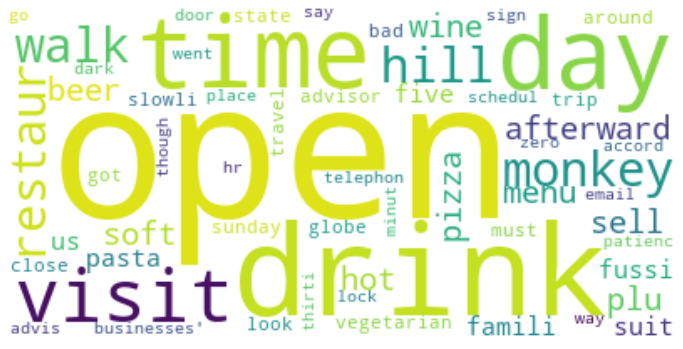

In [35]:
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

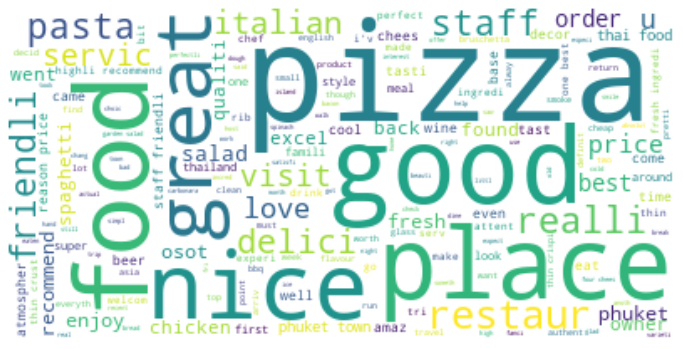

In [36]:
#wordcloud of words from postive reviews by a hotel
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

#display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
#We can use the tabulate method to understand the most frequent positive words,and the number of occurrences of each.
#use the nltk Freqdist and then tabulate
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   pizza     food     good    place     nice    staff friendli    great  restaur   realli 
      90       55       50       44       38       28       28       27       24       21 


In [38]:
#We can use the tabulate method to understand the most frequent negative words,and the number of occurrences of each.
#use the nltk Freqdist and then tabulate
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

   open   drink     day    time      00   visit  monkey    hill    walk restaur 
      4       2       2       2       2       1       1       1       1       1 


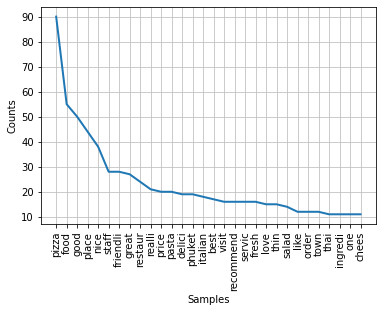

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
#Using plot method to create a frequency distribution plot for the most frequent words in the positive reviews
pos_freqdist.plot(30)

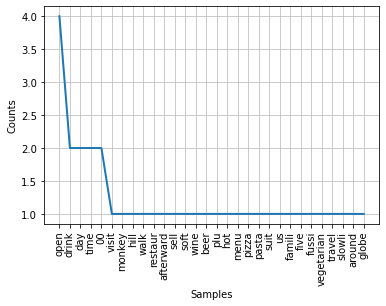

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
#Using plot method to create a frequency distribution plot for the most frequent words in the negative reviews
neg_freqdist.plot(30)